In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/Ujeverson/datasets/main/Salary_Data.csv '

In [3]:
wage = pd.read_csv(url)
wage.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x = wage['YearsExperience']
y = wage['Salary']

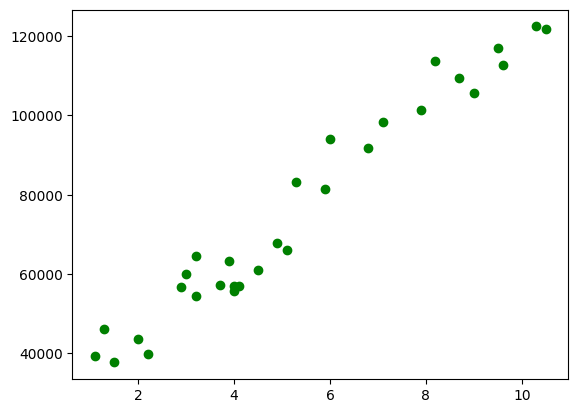

In [12]:
plt.scatter(x, y, color='green')

In [14]:
xs = x.sum()
xs

159.4

In [15]:
ys = y.sum()
ys

2280090.0

In [17]:
xy = x*y

In [18]:
xys = xy.sum()
xys

14321961.0

In [19]:
x2 = x**2
print(x2.head())

0    1.21
1    1.69
2    2.25
3    4.00
4    4.84
Name: YearsExperience, dtype: float64


In [20]:
x2s = x2.sum()
x2s

1080.5

In [21]:
n = len(wage)
n

30

In [23]:
a = (n*xys - xs*ys) / (n*x2s - xs**2)
print(a)
print(round(a, 2)) 

9449.962321455077
9449.96


In [24]:
b = (ys - a*xs) / n
b

25792.200198668685

In [ ]:
#pegar os dados via selenium do site https://br.investing.com/currencies/usd-brl
#xpath: //*[@id="__next"]/div[2]/div[2]/div[2]/div[1]/div[1]/div[3]/div[1]/div[1]/div[1]

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

options = Options()
#options.add_argument('--headless')  # Executa o Chrome em segundo plano (sem interface gráfica)

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.get('https://br.investing.com/currencies/usd-brl')

# Aguarda o carregamento da página
driver.implicitly_wait(10)  

# Localiza o elemento que contém a cotação do dólar
element = driver.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[2]/div[1]/div[1]/div[3]/div[1]/div[1]/div[1]')
usd_brl = element.text
# Converte a cotação para float
usd_brl = float(usd_brl.replace(',', '.'))
print(usd_brl)

5.8551


In [42]:
xyears = 34 # Anos de experiência
wyears = round(a*xyears + b,2)
wyearsBRL = round(wyears * usd_brl,2)

print(f'Com {xyears} anos de experiência, o salário é de US$ {wyears} ou R${wyearsBRL}')

Com 34 anos de experiência, o salário é de US$ 347090.92 ou R$2032252.05
